# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [4]:
x_train = data_train[:,0]
y_train = data_train[:,1]

x_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``np.ones(n)`` для создания массива из единиц длины $n$ и ``np.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [5]:
X = np.concatenate((x_train.reshape(-1, 1),
                      np.ones_like(x_train).reshape(-1, 1)), 
                      axis=1)

k, b = np.linalg.inv(X.T @ X) @ X.T @ y_train

display(Latex("$" +f"y = {k}x + {b}" + "$"))

<IPython.core.display.Latex object>

**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

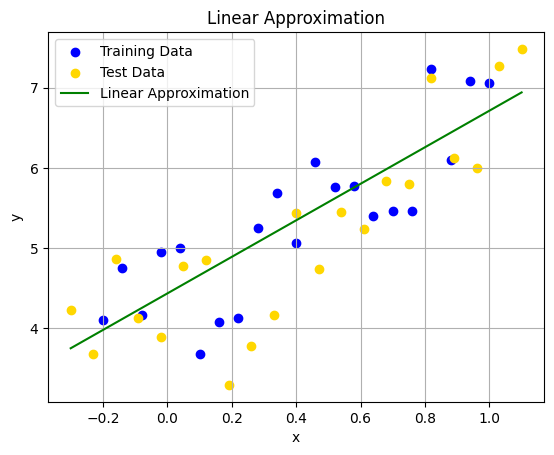

In [6]:
def show_training_data():
    plt.scatter(x_train, y_train, color="blue", label="Training Data")

def show_test_data():
    plt.scatter(x_test, y_test, color="gold", label="Test Data")

def linear_approximation(x, k1=k, b1=b):
    return k1 * x + b1

def setup_graph(title=""):
    if title != "":
        plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

def get_total_linspace():
    return np.linspace(min(*x_train, *x_test),
                      max(*x_train, *x_test),
                      100)

def get_training_linspace():
    return np.linspace(min(x_train),
                      max(x_train),
                      100)

show_training_data()
show_test_data()

x_range = get_total_linspace()

plt.plot(x_range, 
         linear_approximation(x_range), 
         color="green", 
         label="Linear Approximation")

setup_graph("Linear Approximation")

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [7]:
def polynomial(a_is):
    functions = []
    for i, a in enumerate(a_is[::-1]):
        functions.append(lambda x, i=i, a=a: a * x ** i)
    
    return lambda x: sum([function(x) for function in functions])

def get_latex_polynomial(a_is):
    a_is = a_is[::-1]
    result = ""
    for i, a in enumerate(a_is):
        if i == 0:
            result += str(a) 
        elif i == 1:
            result += "+" + str(a) + "x"
        else:
            result += "+" + str(a) + "x^{" + str(i) + "}"
    
    return "$" + result + "$"

# ---------------------------

# as we may observe later in the task, polynomials of higher and higher degrees
# are better and better fits, so I'll stop at degree 10 but realistically
# we could go to infinity

a_i = np.polyfit(x_train, y_train, 10)
poly_train = polynomial(a_i)(x_train)

print(f"Polynomial Degree {10}:")
display(Latex(get_latex_polynomial(a_i)))

Polynomial Degree 10:


<IPython.core.display.Latex object>

**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

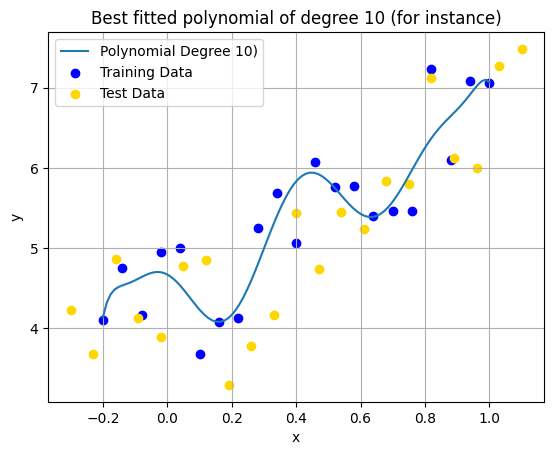

In [8]:
x_range = get_training_linspace()

plt.plot(x_range, 
         polynomial(a_i)(x_range), 
         label=f"Polynomial Degree {10})")

show_training_data()
show_test_data()
setup_graph("Best fitted polynomial of degree 10 (for instance)")

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [9]:
def get_mse(x, y, a_i):
    poly = polynomial(a_i)(x)
    return np.mean((y - poly) ** 2)

mse_train = []
mse_test = []
polynomials = []

for i in range(1, 11):
    a_i = np.polyfit(x_train, y_train, i)
    
    mse_train.append(get_mse(x_train, y_train, a_i))
    mse_test.append(get_mse(x_test, y_test, a_i))
    polynomials.append(polynomial(a_i)(x_range))
    
    print(f"Polynomial Degree {i}")
    display(Latex(get_latex_polynomial(a_i)))
    

Polynomial Degree 1


<IPython.core.display.Latex object>

Polynomial Degree 2


<IPython.core.display.Latex object>

Polynomial Degree 3


<IPython.core.display.Latex object>

Polynomial Degree 4


<IPython.core.display.Latex object>

Polynomial Degree 5


<IPython.core.display.Latex object>

Polynomial Degree 6


<IPython.core.display.Latex object>

Polynomial Degree 7


<IPython.core.display.Latex object>

Polynomial Degree 8


<IPython.core.display.Latex object>

Polynomial Degree 9


<IPython.core.display.Latex object>

Polynomial Degree 10


<IPython.core.display.Latex object>

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [10]:
for i in range(1, 11):
    print(f"Polynomial Degree {i}: MSE for training data: {mse_train[i - 1]}, MSE for testing data: {mse_test[i - 1]}")

Polynomial Degree 1: MSE for training data: 0.29689663326251964, MSE for testing data: 0.43512020040488864
Polynomial Degree 2: MSE for training data: 0.26969891587669137, MSE for testing data: 0.35647628878312276
Polynomial Degree 3: MSE for training data: 0.26949718714796084, MSE for testing data: 0.3553464571518426
Polynomial Degree 4: MSE for training data: 0.2610665330579276, MSE for testing data: 0.4417270189283707
Polynomial Degree 5: MSE for training data: 0.24998504648317535, MSE for testing data: 0.5579732021691418
Polynomial Degree 6: MSE for training data: 0.1882934898837077, MSE for testing data: 2.5816929336973806
Polynomial Degree 7: MSE for training data: 0.18539621153294394, MSE for testing data: 2.5157829032609285
Polynomial Degree 8: MSE for training data: 0.1590555657909307, MSE for testing data: 4.357288520750128
Polynomial Degree 9: MSE for training data: 0.15847184274700027, MSE for testing data: 4.776342278514996
Polynomial Degree 10: MSE for training data: 0.15

**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

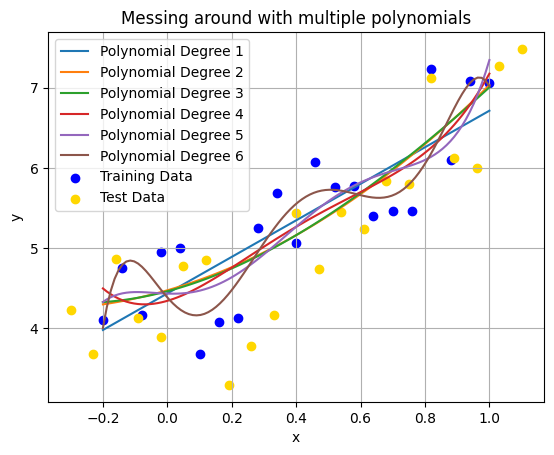

In [11]:
for i, poly in enumerate(polynomials[:6], 1):
    plt.plot(x_range, 
            poly, 
            label=f"Polynomial Degree {i}")

show_training_data()
show_test_data()

setup_graph("Messing around with multiple polynomials")


**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

Typically as we increase the degree of the polynomial, the error rate decreases. This is proven for the training data (see above). This phenomenon in machine learning is called overfitting and it happens whenever the model starts perceiving random noise as actual data, although it shouldn't happen. It most sharply can be seen for a polynomial of degree $10$, when MSE jumps by $\approx 10$. This leads to the model performing extremely well only on the training data, but not on the testing data :(

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import display, Latex

data = pd.read_csv('flats_moscow_mod.txt', sep='\t')
x = data.drop(columns=['price'])
y = data['price']

x_train, x_test, y_train, y_test = map(np.array, train_test_split(x, y, test_size=0.3, random_state=69))

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [13]:
X = np.concatenate((x_train.reshape(-1, 5),
                      np.ones(x_train.shape[0]).reshape(-1, 1)), 
                      axis=1)

coefficients = np.linalg.inv(X.T @ X) @ X.T @ y_train
print(coefficients)

# check whether everything worked correctly
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# the output suggests that it did, although it doesn't show the bias coefficient
print(model.coef_)

def get_linear_model_string(names, coeffs):
    result = ""
    for i in range(len(names)):
        result += str(coeffs[i]) + names[i] + "+"
    return "$" + result + str(coeffs[-1]) + "$"

print("\nLinear Regression Model:")
display(Latex(get_linear_model_string(["totsp", "livesp", "kitsp", "dist", "metrdist"], coefficients)))

[  1.58603594   1.81076412   1.0596983   -3.31993692  -1.35401965
 -33.5660746 ]
[ 1.58603594  1.81076412  1.0596983  -3.31993692 -1.35401965]

Linear Regression Model:


<IPython.core.display.Latex object>

**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

The plus sign implies that the price has a direct dependency on this factor. First three factors are the areas of total, living, and kitchen spaces in the flat, which makes sense that the price would increase as any of these factors increases, so yep, it correlates with my perception about how life works.

The minus sign, on the other hand, implies that the price has an inverse dependency on this factor. Last two factors are the distances from Moscow's center and the metro station, which also totally makes sense that the price would decrease as any of these factors increases. Likewise, it also correlates with my understanding of life. 

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [14]:
def manual_mse(data, prediction):
    return np.mean((data - prediction) ** 2)


y_prediction_manual = np.dot(np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1), coefficients)
print("MSE,  manual model:", manual_mse(y_test, y_prediction_manual))

# similarly as above, check how close am I to the actual values
from sklearn.metrics import mean_squared_error

y_prediction_sklearn = model.predict(x_test)
mse_sklearn = mean_squared_error(y_test, y_prediction_sklearn)
print("MSE, sklearn model:", mse_sklearn)

# everything seems to be okay, lost a couple of digits due to
# floating-point precision calculations

MSE,  manual model: 679.2452953447577
MSE, sklearn model: 679.2452953447714


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

Personally, I don't require a lot of living space, so there are diminishing returns as we get more and more space. For this reasons, I will introduce three new factors, each of them run through a log transformation in advance. On the other hand, I really like not having to spend long communiting, because time is really valuable, so I will try to make those factors more prominent in our estimations and square them.

Alternatively, I tried to introduce Cobb-Douglas-esque dependencies for groups of similar factors and tried to mess around with the exponent coefficients, but I only had considerably worse results (up to a 1000 MSE, even, so I didn't include this variant in the lab).

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [15]:
data['logtotsp'] = np.log(data['totsp'])
data['logkitsp'] = np.log(data['kitsp'])
data['loglivesp'] = np.log(data['livesp'])
data['distsquared'] = data['dist'] ** 2
data['metrdistsquared'] = data['metrdist'] ** 2

x = data[['totsp', 'kitsp', 'livesp', 'logtotsp', 'logkitsp', 'loglivesp', 'dist', 'metrdist', 'distsquared', 'metrdistsquared']]
y = data['price']

x_train, x_test, y_train, y_test = map(np.array, train_test_split(x, y, test_size=0.3, random_state=69))

X = np.concatenate((x_train,
                    np.ones(x_train.shape[0]).reshape(-1, 1)),
                   axis=1)

coefficients = np.linalg.inv(X.T @ X) @ X.T @ y_train
print(coefficients)

print("\nLinear Regression Model:")
display(Latex(get_linear_model_string(['totsp', 'kitsp', 'livesp', '\log(totsp)', '\log(kitsp)', '\log(livesp)', 'dist', 'metrdist', 'dist^2', 'metrodist^2'], coefficients)))


[ 1.23382967e+00 -2.23877975e+00  1.28977413e+01  8.47777747e+00
  3.95568515e+01 -5.51834922e+02 -4.93829593e+00 -3.11075002e+00
  8.04348788e-02  1.05960396e-01  1.50917339e+03]

Linear Regression Model:


<IPython.core.display.Latex object>

**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [16]:
y_prediction_manual = np.dot(np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1), coefficients)
print("MSE,  manual model:", manual_mse(y_test, y_prediction_manual))

# it appears that my MSE has only worsened, which implies I suck at predicting the property market
# but since it was not required in the task, I'll keep it as-is

MSE,  manual model: 682.5245822405523


---

In [17]:
# In case the previous task required to not keep the original factors, here is an
# alternatively version, but it's actually considerably worse than above

data['logtotsp'] = np.log(data['totsp'])
data['logkitsp'] = np.log(data['kitsp'])
data['loglivesp'] = np.log(data['livesp'])
data['distsquared'] = data['dist'] ** 2
data['metrdistsquared'] = data['metrdist'] ** 2

x = data[['logtotsp', 'logkitsp', 'loglivesp', 'distsquared', 'metrdistsquared']]
y = data['price']

x_train, x_test, y_train, y_test = map(np.array, train_test_split(x, y, test_size=0.3, random_state=69))

X = np.concatenate((x_train,
                    np.ones(x_train.shape[0]).reshape(-1, 1)),
                   axis=1)

coefficients = np.linalg.inv(X.T @ X) @ X.T @ y_train
print(coefficients)

print("\nLinear Regression Model:")
display(Latex(get_linear_model_string(['\log(totsp)', '\log(kitsp)', '\log(livesp)', 'dist^2', 'metrodist^2'], coefficients)))

y_prediction_manual = np.dot(np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1), coefficients)
print("MSE,  manual model:", manual_mse(y_test, y_prediction_manual))

[ 1.26051779e+02  8.18239690e+00  8.22569587e+01 -1.58884838e-01
 -7.66930251e-02 -7.15238990e+02]

Linear Regression Model:


<IPython.core.display.Latex object>

MSE,  manual model: 739.6127382285883


### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Regularization is an excellent way to combat overfitting. If we were to take a regulatization coefficient on a training dataset, we risk to only take this specific selection of factors into account, which counters the utility we get from regularization. As for the testing dataset, those datasets typically have less data than the training data, so taking a regularization coefficent based on it might only make things worse because it might be too irregular or crude to our liking.

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

# I have not found a single place that would explicitly restrict this approach
# I still at least try to do most things by hand and only use the library
# if it would require to do either do the same thing over and over again
# that has already been covered above or as a means of a sanity check :) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

x_train = data_train[:,0]
y_train = data_train[:,1]

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state=69)

print(x_train, y_train, x_validation, y_validation, sep="\n\n")

x_test = data_test[:,0]
y_test = data_test[:,1]

[-0.02  0.4   0.04  0.1   0.7  -0.2   0.16 -0.14  0.28  0.94  0.82  1.
  0.34  0.46]

[4.94568077 5.06788376 4.9964461  3.67344585 5.46744837 4.10083261
 4.07405522 4.75632474 5.25101279 7.0778812  7.23168494 7.05182585
 5.69160283 6.07176274]

[ 0.64  0.76  0.88  0.22 -0.08  0.58  0.52]

[5.39647832 5.46450349 6.09781368 4.12650853 4.16278839 5.76998646
 5.76661215]


**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [19]:
# our goal is to have MSE lower than for the optimal polynomial below:
# Polynomial Degree 3: ... MSE for testing data: 0.3553464571518426

# technically I could've tried to just plug in random values, but 
# what would then be the point of the validation dataset? 

best_lambda = None
best_error = 0.3553464571518426

print("Searching for lambdas...")
# even using a logarithm-esque scale for possible lambda values
for lambda_val in [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2, 2.5, 3, 5, 10, 20, 50, 100]:
    model = Ridge(alpha=lambda_val)
    model.fit(x_train.reshape(-1, 1), y_train)
    
    y_pred = model.predict(x_validation.reshape(-1, 1))
    error = mean_squared_error(y_validation, y_pred)

    if error <= best_error:
        best_lambda = lambda_val
        best_error = error
    
    print(lambda_val, error)

print("Best lambda:", best_lambda, end="\n\n")

# also let's actually calculate X properly first, 
# adding extra factors of different degrees up to 3

X = np.concatenate((x_train.reshape(-1, 1), (x_train ** 2).reshape(-1, 1), (x_train ** 3).reshape(-1, 1), np.ones(x_train.shape[0]).reshape(-1, 1)), axis=1)

coefficients = np.linalg.inv(X.T @ X + best_lambda * np.eye(4, 4)) @ X.T @ y_train

# As we have got a lower MSE, we have assured ourselves 
# that the error rate is better for a regulated model
print(f"MSE for our regulated model with lambda {best_lambda} is")
print(get_mse(x_train, y_train, coefficients))

Searching for lambdas...
0.01 0.39287337740239436
0.05 0.38223925194739167
0.1 0.3702339643892684
0.5 0.3108964248574025
1.0 0.2866848483615648
1.5 0.2852712776942474
2 0.29291592112094067
2.5 0.3040290620417433
3 0.3161793076896048
5 0.3607499543634775
10 0.42762892531322355
20 0.48107979991275257
50 0.5230561851447286
100 0.5391408736537932
Best lambda: 1.5

MSE for our regulated model with lambda 1.5 is
0.5828473500661742


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

In [20]:
print(np.linalg.det(X.T @ X))
print(np.linalg.det(X.T @ X + best_lambda * np.eye(4, 4)))

# we clearly see that the second determinant is larger
# let's also print the matrix for clarity
print(X.T @ X)

0.12766818902317992
271.0713963172704
[[ 3.7088      2.941952    2.56559744  4.88      ]
 [ 2.941952    2.56559744  2.30955592  3.7088    ]
 [ 2.56559744  2.30955592  2.12721176  2.941952  ]
 [ 4.88        3.7088      2.941952   14.        ]]


This matrix is basically the Gram matrix, which is always positively semi-defined. Per its attibutes, if we were to add some positive scalar to each element on this matrix's diagonal, it is physically impossible for it to suddenly turn negative to zero per definition of a positively defined quadratic form.

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

[-293.97610669  725.43672672 -593.49885326  155.26648264   15.04581317
   -5.99277784    4.62186261] [1.19460922 0.75768181 0.47082484 0.32935784 0.23912892 0.17627362
 4.10714244]


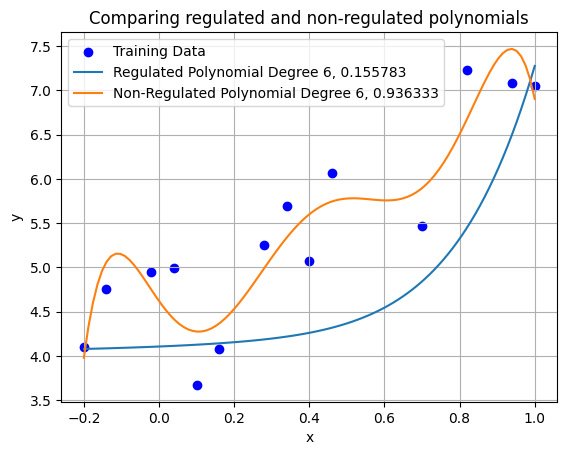

In [21]:
X = np.concatenate((x_train.reshape(-1, 1), *[(x_train ** i).reshape(-1, 1) for i in range(2, 7)], np.ones(x_train.shape[0]).reshape(-1, 1)), axis=1)

coefficients = np.polyfit(x_train, y_train, 6)
regulated_coefficients = np.linalg.inv(X.T @ X + best_lambda * np.eye(7, 7)) @ X.T @ y_train

print(coefficients, regulated_coefficients)

x_range = np.linspace(min(x_train), max(x_train), 100)

plt.scatter(x_train, y_train, color="blue", label="Training Data")

plt.plot(x_range, 
         polynomial(regulated_coefficients)(x_range), 
         label=f"Regulated Polynomial Degree {6}, {get_mse(x_train, y_train, coefficients):2f}")

plt.plot(x_range,
         polynomial(coefficients)(x_range),
         label=f"Non-Regulated Polynomial Degree {6}, {get_mse(x_train, y_train, regulated_coefficients):2f}")

setup_graph("Comparing regulated and non-regulated polynomials")

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

The regulated function is considerably more smooth. Therefore, it's way more likely it will not overfit to real-life data since it's considerably less sophisticated. This is really beneficial since we wouldn't unnecessarily overcomplicate things, which is far easier to work with. 

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.


This is our loss function of $a$. We need to minimize it, so find the gradient:

$$\nabla L_a=-2X^T(y-Xa)+2\lambda a$$

Now solve it for $\nabla L_a=0$:

$$0=-2X^T(y-Xa)+2\lambda a=X^T(y-Xa)-\lambda a\\X^Ty-X^TXa-\lambda a=X^Ty-(X^TX+\lambda E)a$$

Now we get $a$:

$$a=(X^TX+\lambda E)^{-1}X^Ty$$

which is really similar to the formulas we had above :)

As for the number of solutions, we have concluded above that the determinant of the matrix that we need to inverse is always positive because it's the Gram matrix, so it makes me think that there is always a single solution that would be most optimal. The solutions definitely exist because the matrix in the parentheses is always invertible. This is applicable to both cases when lambda is either $0$ (then we get a simple Gram's matrix) and when the lambda is non-zero (then, see one of the proofs above). 

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

The coefficient next to the constant factor is a bad idea because it's usually the baseline of the dependent variables if they're not present. Thus, regulating it distorts our interpretation and may cause something weird to occur or something like this, idk. Furthermore, we may accidentally modify other dependencies or make the model less applicable to the general case, or further distort our model a plethora of imperceivable different ways, which we definitely not want.

Effectively, regulating the constant factor coefficient may cause our model to collapse into something around zero and be very unstable, which isn't in our interests.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

If the rank of the matrix $X$ is less than the number of its columns and $\lambda=0$, then it may conclude that there would either be no solutions or infinitely many solutions because the Gram's matrix would be singular and thus, non-invertible.

In case we would take $\lambda > 0$, then nothing would change from above because we have introduced regulation specifically to fight the case when our matrix may turn singular. Since it would not be singular for such lambda, then there would be only a single solution.

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

Assume that the stated condition is not true and there is a limited number of solutions. Then there is an extremum and an infinum out of the set of solutions. Then, take two vectors in the vicinity of the supremum and the infimum.

Since we know that the set of all solutions of a linear system of equations forms a subspace, then we may take a linear combination of these two vectors that would lie beyond the supremum or an infimum, since the subspace is unbounded unless it's singular (which is impossible since we require an infinite number of soltuions). Therefore, we may conclude that the weights in a linear model may be however large.

---


Large weights make the interpretation of the model considerably more difficult and make it far more perceptive to noise, so we may face a higher likelihood of overfitting the mode, making it unstable, and raising the MSE.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

1. Define $X_{(t)} = [x_1, x_2, …, x_t]$, where $x_i$ -- are columns of matrix $X_{(t)}$, and respectively for $y_{(t)}.$
2. Add new pair $(x_{t+1}, y_{t+1})$ to matrices $X_{(t)}$ и $y_{(t)}$, getting $X_{(t+1)} = [x_1, x_2, …, x_t, x_{t+1}]$ and $y_{(t+1)} = [y_1, y_2, …, y_t, y_{t+1}].$
3. Then, calculate matrices $X^T_{t+1}X_{t+1}$ and $X^T_{t+1}y_{t+1}$ as follows:
   - $X^T_{(t+1)}X_{(t+1)} = X^T_{(t)}X_{(t)} + x_{t+1}x^T_{t+1}$
   - and similarly for the second one: $X^T_{(t+1)}y_{(t+1)} = X^T_{(t)}y_{(t)} + x_{t+1}y^T_{t+1}$

The asympotics of this algorithm depends only on $\dim{x_{t+1}}=d$ and is equal to $O(d^2)$. This algorithm's complexity obviously does not depend on $t$, so it should suffice. All the new operations with the new pair $(x_{t+1}, y_{t+1})$ only handles vectors of degree $d$ (we just multiply vectors $x_{t+1}$ and $y_{t+1}$, and there we need to calculate $d^2$ multiplications and the same number of additions afterwards, so it's perfect for our goal), which is constant in relation to $t$.

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

prediction for  3.706551211558037 10.496491493004147


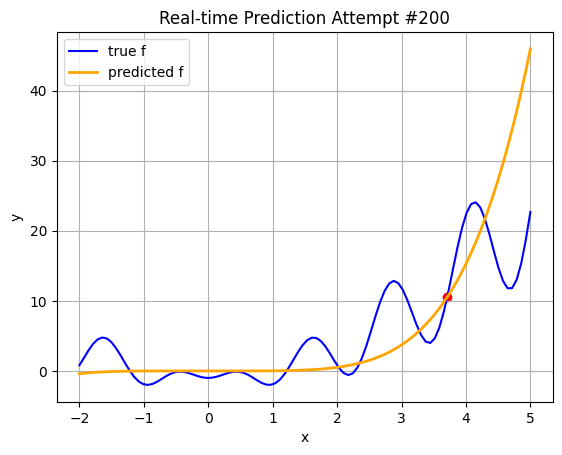

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1

degree = 5
theta = np.zeros(degree + 1)

def predict(x, theta):
    return np.dot(np.power(x, np.arange(degree+1)), theta)

x_grid = np.linspace(-2, 5, 100)
y_grid = f_true(x_grid)

# I have not found a single place that would explicitly restrict this approach
from sklearn.linear_model import Ridge

alpha = 0.1
ridge = Ridge(alpha=alpha, fit_intercept=False)

for i in range(200):
    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()

    A = np.vstack([x_new ** j for j in range(degree + 1)]).T
    ridge.fit(A, np.array([y_new]))

    if (i + 1) % 5 == 0:
        clear_output(True)
        print("prediction for ", x_new, y_new)
        plt.plot(x_grid, y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')

        y_pred = ridge.predict(np.vstack([x_grid ** j for j in range(degree + 1)]).T)
        
        # scatter works kinda meh here so I changed it
        plt.plot(x_grid, y_pred, color='orange', linewidth=2, label='predicted f')

        setup_graph("Real-time Prediction Attempt #" + str(i + 1))

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.